In [12]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline

import geometry
import model
import solvers_filled as solvers

In [13]:
mesh, BCs = geometry.getArc()
coordinates, connectivity = mesh['coordinates'], mesh['connectivity']

modelA = model.Model()
modelA.mesh.addNodes(coordinates)
modelA.mesh.addConnectivity(connectivity)

modelA.material.setProperties(40000, 0.2)
modelA.section.setProperties(1)

modelA.setBoundaryConditions(BCs)

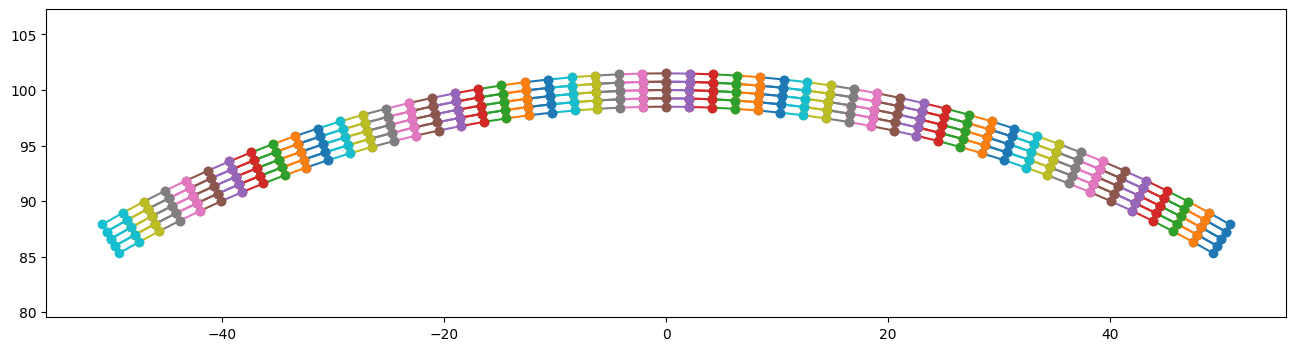

In [14]:
modelA.plotUndeformed(size=(16, 4))

In [ ]:
solver = solvers.Static()

solver.setTolerance(1e-2)
solver.setMaxIterations(20)
solver.setSolutionAttempts(10)

## Arc method

In [ ]:
# Arc-length
solver.setConstraint("Arc")
uA, lambdasA = solver.solve(modelA, np.ones(1000))


  0%|          | 0/1000 [00:00<?, ?it/s]

Step 1
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 7.102e-03
Step 2
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 8.291e-03
Step 3
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 9.624e-03
Step 4
  Attempt 1
    Solution converged after 3 iterations
    Residual norm 1.079e-03
Step 5
  Attempt 1
    Solution converged after 3 iterations
    Residual norm 1.249e-03
Step 6
  Attempt 1
    Solution converged after 3 iterations
    Residual norm 1.434e-03
Step 7
  Attempt 1
    Solution converged after 3 iterations
    Residual norm 1.633e-03
Step 8
  Attempt 1
    Solution converged after 3 iterations
    Residual norm 1.844e-03
Step 9
  Attempt 1
    Solution converged after 3 iterations
    Residual norm 2.066e-03
Step 10
  Attempt 1
    Solution converged after 3 iterations
    Residual norm 2.300e-03
Step 11
  Attempt 1
    Solution converged after 3 iterations
    Residual norm 2.546e-03
Step 12
  Attempt 1

Text(0, 0.5, '$\\lambda$')

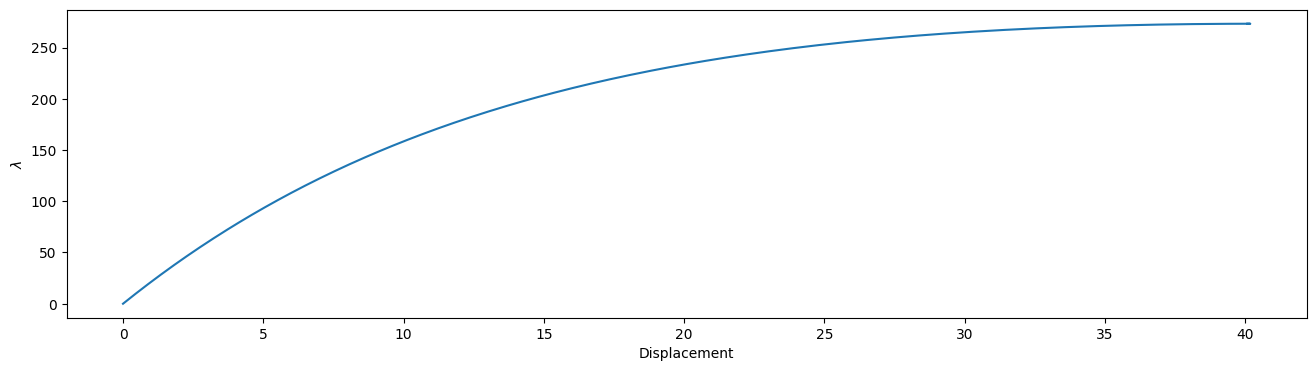

In [18]:
plt.figure(figsize=(16, 4))
plt.plot(uA, lambdasA)

plt.xlabel('Displacement')
plt.ylabel(r'$\lambda$')

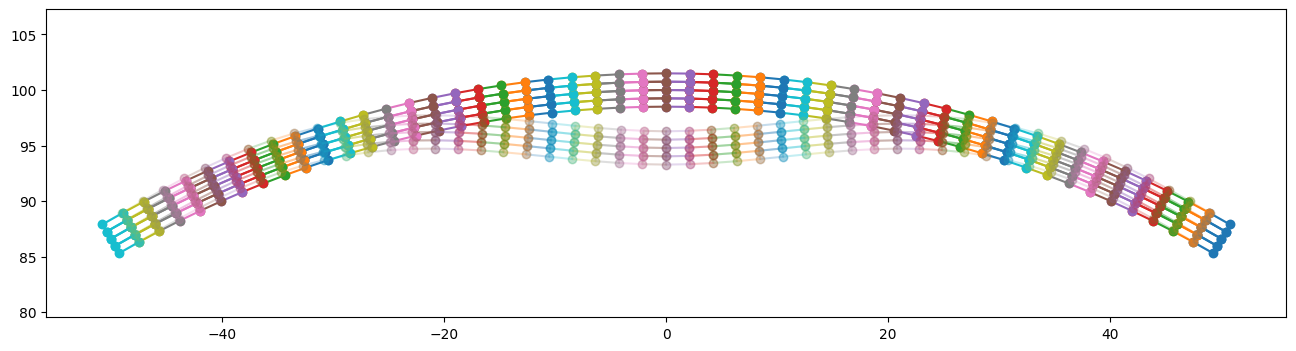

In [19]:
modelA.plotUndeformed(size=(16, 4))
modelA.plotDeformed(scale=1, alpha=0.25)

### Comments:
Displacement and load control methods do not work as they are not able to handle the flattening of the u-lambda curve (non-monotonic), but the arc method algorithm takes forever(500min) without the arc overturning, so maybe the solver is not working correct? Tol was set to 10e-2 and max attempts 10, 6 would have been enough
also more steps are needed to reach snap through apparently?

## Riks Method

In [20]:
# Arc-length
solver.setConstraint("Riks")
#u, lambdas = solver.solve(modelA, np.ones(1000))
uR, lambdasR = solver.solve(modelA, np.ones(1000))

  0%|          | 0/1000 [00:00<?, ?it/s]

Step 1
  Attempt 1
    Failed to reach convergence after 20 iterations
    Residual norm 1.181e+01
    Reducing increment from 1.000e+00 to 5.000e-01
  Attempt 2
    Solution converged after 1 iterations
    Residual norm 1.984e-03
Step 2
  Attempt 1
    Failed to reach convergence after 20 iterations
    Residual norm 1.202e+01
    Reducing increment from 1.000e+00 to 5.000e-01
  Attempt 2
    Solution converged after 1 iterations
    Residual norm 7.414e-03
Step 3
  Attempt 1
    Failed to reach convergence after 20 iterations
    Residual norm 1.223e+01
    Reducing increment from 1.000e+00 to 5.000e-01
  Attempt 2
    Solution converged after 4 iterations
    Residual norm 7.308e-03
Step 4
  Attempt 1
    Failed to reach convergence after 20 iterations
    Residual norm 1.203e+01
    Reducing increment from 1.000e+00 to 5.000e-01
  Attempt 2
    Solution converged after 1 iterations
    Residual norm 8.026e-03
Step 5
  Attempt 1
    Failed to reach convergence after 20 iterations
 

Text(0, 0.5, '$\\lambda$')

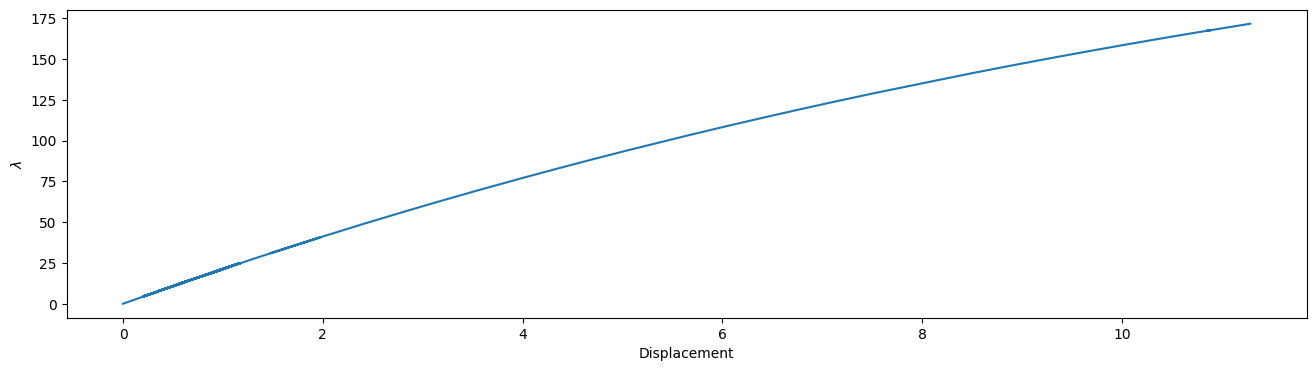

In [21]:
plt.figure(figsize=(16, 4))
plt.plot(uR, lambdasR)

plt.xlabel('Displacement')
plt.ylabel(r'$\lambda$')

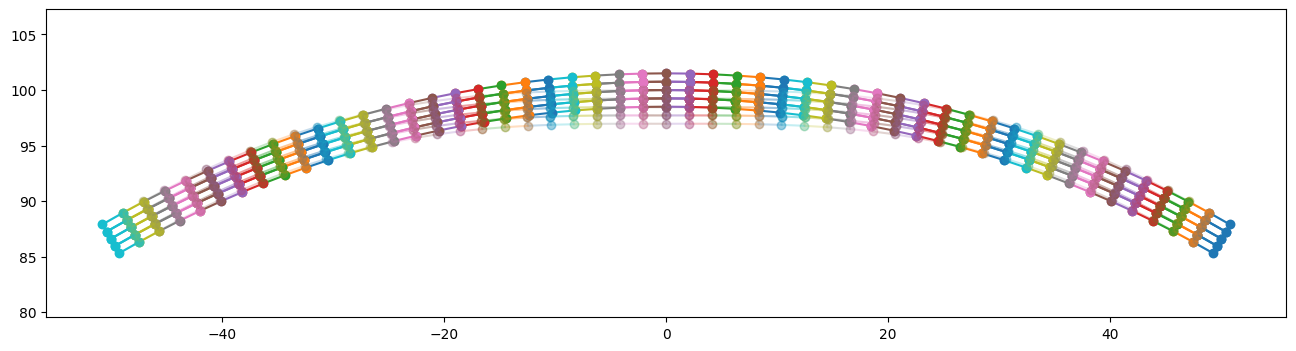

In [22]:
modelA.plotUndeformed(size=(16, 4))
modelA.plotDeformed(scale=1, alpha=0.25)

Comment: riks starts out a bit slower, but generally performs very well for 0.5 increments, would be worth to start with 0.5 straight away. in general smaller steps with less maximal iterations